In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [32]:
df_pysynthlab = pd.read_csv('../benchmark/sygus_solver_pysynthlab_results_new.csv')
df_pysynthlab['run_datetime'] = pd.to_datetime(df_pysynthlab['run_datetime'])
df_pysynthlab['solver'] = 'PySynthLab'
df_pysynthlab['config'] = df_pysynthlab['config'].str.split('/').str[-1].str.replace('.yaml', '').str.replace('benchmark_','')
df_pysynthlab.rename(columns={'config': 'configuration'}, inplace=True)
df_pysynthlab['file'] = df_pysynthlab['file'].str.split('/').str[-1].str.replace('.sl', '')
df_pysynthlab.rename(columns={'file': 'problem'}, inplace=True)
df_pysynthlab['success'] = df_pysynthlab['return_code'] == 0

def extract_solution(stdout, return_code):
    if return_code == 0 and 'Metrics summary:' in stdout:
        lines = stdout.strip().split('\n')
        if len(lines) > 1:
            res = lines[1].split(': ', 1)[1] if ': ' in lines[1] else lines[1]
            return res.strip()
    return ''
    
df_pysynthlab['solution'] = df_pysynthlab.apply(lambda row: extract_solution(row['stdout'], row['return_code']), axis=1)
df_pysynthlab.head()

,run_id,run_datetime,solver,configuration,problem,return_code,time,avg_cpu_percentage,max_memory_usage,avg_all_cpu,...,solution_complexity,best_partial_score,grammar_size,solution_found,solution_space_coverage,solver_calls,unique_patterns,pattern_reuse_ratio,success,solution
0,92e6b38a-682d-4011-9951-02bbe8cbfb02,2024-08-12 21:44:47.838685,PySynthLab,random_enumerative_bottom_up,absolute,0,1.002077,12.483333,0.000000,"[13.3, 8.1, 16.8, 8.1, 28.6, 8.9, 20.4, 12.0, ...",...,1.0,0.0,0.0,True,0.0,0.0,0.0,0.0,True,Var(0)*-1
1,92e6b38a-682d-4011-9951-02bbe8cbfb02,2024-08-12 21:44:47.838685,PySynthLab,fast_enumerative,absolute,0,1.002610,13.312500,0.000000,"[16.2, 9.0, 15.2, 8.1, 29.0, 8.1, 23.8, 11.0, ...",...,0.0,0.0,24.0,True,0.0,0.0,0.0,0.0,True,Var(0)
2,37082fdc-3fe2-4b9a-94f7-14b51a869864,2024-08-12 21:46:05.526144,PySynthLab,random_enumerative_bottom_up,absolute,0,1.002075,13.150000,0.000000,"[16.7, 8.9, 11.5, 9.0, 22.7, 23.5, 17.5, 8.0, ...",...,1.0,0.0,0.0,True,0.0,0.0,0.0,0.0,True,Var(0)*-1
3,37082fdc-3fe2-4b9a-94f7-14b51a869864,2024-08-12 21:46:05.526144,PySynthLab,fast_enumerative,absolute,0,1.003117,12.750000,0.000000,"[13.0, 10.0, 14.6, 9.0, 24.7, 8.9, 18.6, 19.0,...",...,0.0,0.0,24.0,True,0.0,0.0,0.0,0.0,True,Var(0)
4,37082fdc-3fe2-4b9a-94f7-14b51a869864,2024-08-12 21:46:05.526144,PySynthLab,random_weighted_top_down,absolute,-15,30.020212,9.700972,88.308594,"[7.2, 5.8933333333333335, 6.213333333333334, 5...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,


In [33]:
df_cvc5 = pd.read_csv('../benchmark/sygus_solver_cvc5_results_new.csv')
df_cvc5['config'] = (df_cvc5['config']
                .str.replace('--tlimit=30000', '')
                .str.replace('--sygus-enum=', '')
                .str.replace('--sygus-si=', '_single_invocation_')
                .str.replace('--', '_')
                .str.replace('-', '_')
                .str.replace('=', '_')
                .str.replace(' ', '')
                )
df_cvc5.rename(columns={'config': 'configuration'}, inplace=True)
df_cvc5['file'] = df_cvc5['file'].str.replace('/data/Documents/DataScience/Courses/Dissertation/problems/sygus_comp_2019_clia_track/', '').str.replace('.sl','').str.strip()
df_cvc5.rename(columns={'file': 'problem'}, inplace=True)
df_cvc5['solver'] = 'CVC5'
df_cvc5['success'] = df_cvc5['return_code'] == 0
df_cvc5['solution'] = df_cvc5['stdout'].apply(lambda x: x.strip().replace('\n','') if pd.notna(x) else '')
df_cvc5.head()

,run_id,run_datetime,solver,configuration,problem,return_code,time,avg_cpu_usage,max_memory_usage,stdout,stderr,success,solution
0,b699c394-9c7c-489d-ad5c-9ca3fb146a88,2024-08-11T16:52:48.609846,CVC5,smart,absolute,0,0.100908,0.0,0.382812,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN,True,((define-fun abs ((x Int)) Int 1))
1,b699c394-9c7c-489d-ad5c-9ca3fb146a88,2024-08-11T16:52:48.609846,CVC5,random,absolute,0,0.101807,0.0,0.421875,(\n(define-fun abs ((x Int)) Int x)\n)\n,NaN,True,((define-fun abs ((x Int)) Int x))
2,b699c394-9c7c-489d-ad5c-9ca3fb146a88,2024-08-11T16:52:48.609846,CVC5,fast,absolute,0,0.101644,0.0,0.222656,(\n(define-fun abs ((x Int)) Int x)\n)\n,NaN,True,((define-fun abs ((x Int)) Int x))
3,b699c394-9c7c-489d-ad5c-9ca3fb146a88,2024-08-11T16:52:48.609846,CVC5,var_agnostic,absolute,0,0.101853,0.0,0.421875,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN,True,((define-fun abs ((x Int)) Int 1))
4,b699c394-9c7c-489d-ad5c-9ca3fb146a88,2024-08-11T16:52:48.609846,CVC5,smart_single_invocation_none,absolute,0,0.101616,0.0,0.195312,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN,True,((define-fun abs ((x Int)) Int 1))


In [34]:
df_comp = pd.read_csv('../../other_solvers/sygus_comp_2017_07_03_results/job_info.csv')

def categorize_solver(solver_name):
    solver_name = solver_name.lower()
    if 'eusolver' in solver_name:
        return 'EUSolver'
    elif 'cvc4' in solver_name:
        return 'CVC4'
    elif 'euphony' in solver_name:
        return 'Euphony'
    elif 'dryadsynth' in solver_name:
        return 'DryadSynth'
    else:
        return solver_name.capitalize()

df_comp['benchmark'] = df_comp['benchmark'].apply(lambda x: x.split('/')[-1].split('.')[0].replace('CLIA_Track/',''))
df_comp.rename(columns={'benchmark': 'problem'}, inplace=True)
df_comp['solver'] = df_comp['solver'].apply(categorize_solver)
df_comp['success'] = df_comp['status'] == 'complete'
df_comp['solution'] = df_comp['result']
df_comp['time'] = df_comp['cpu time']
df_comp.head()

,pair id,problem,benchmark id,solver,solver id,configuration,configuration id,status,cpu time,wallclock time,memory usage,result,expected,exprs-total-size,exprs-details,adheres,smt-result,success,solution,time
0,299131030,fg_array_search_10,4786901,EUSolver,11893,default,219860,complete,6.243910,6.244910,337784.0,correct,correct,411,(findIdx 411),true,sat,True,correct,6.243910
1,299131031,fg_array_search_10,4786901,EUSolver,11898,default,219869,complete,6.298520,6.300540,337528.0,correct,correct,411,(findIdx 411),true,sat,True,correct,6.298520
2,299131032,fg_array_search_10,4786901,Euphony,11902,default,219874,complete,6.543280,6.545470,346184.0,correct,correct,411,(findIdx 411),true,sat,True,correct,6.543280
3,299131033,fg_array_search_10,4786901,CVC4,12289,sygus_c_PBE_Strings,223911,timeout (wallclock),3599.420000,3600.050000,479392.0,unsolved,correct,0,(findIdx -1),n/a (not all solved),not-run,False,unsolved,3599.420000
4,299131034,fg_array_search_10,4786901,CVC4,12289,sygus_c_CLIA,223912,complete,0.057552,0.055354,113120.0,correct,correct,1035,(findIdx 1035),true,sat,True,correct,0.057552


In [35]:
df_combined = pd.concat([
    df_pysynthlab[['problem', 'solver', 'configuration', 'success', 'time', 'solution']],
    df_cvc5[['problem', 'solver', 'configuration', 'success', 'time', 'solution']],
    df_comp[['problem', 'solver', 'configuration', 'success', 'time', 'solution']]
])
df_combined.head()

,problem,solver,configuration,success,time,solution
0,absolute,PySynthLab,random_enumerative_bottom_up,True,1.002077,Var(0)*-1
1,absolute,PySynthLab,fast_enumerative,True,1.002610,Var(0)
2,absolute,PySynthLab,random_enumerative_bottom_up,True,1.002075,Var(0)*-1
3,absolute,PySynthLab,fast_enumerative,True,1.003117,Var(0)
4,absolute,PySynthLab,random_weighted_top_down,False,30.020212,


In [36]:
df_grouped = df_combined.groupby(['solver', 'problem']).agg({
    'success': 'mean',
    'time': 'mean'
}).reset_index()
df_grouped.head()

,solver,problem,success,time
0,CVC4,fg_VC22_a,1.0,1.102929
1,CVC4,fg_VC22_b,1.0,12.085850
2,CVC4,fg_array_search_10,0.6,1439.867645
3,CVC4,fg_array_search_11,0.6,1439.778033
4,CVC4,fg_array_search_12,0.6,1439.803148


In [38]:
solver_performance = df_grouped.groupby('solver').agg({
    'success': 'mean',
    'time': 'mean'
}).reset_index()
solver_performance

,solver,success,time
0,CVC4,0.701370,1092.238916
1,CVC5,0.885012,2.938548
2,DryadSynth,0.434932,6497.544925
3,EUSolver,0.979452,84.802004
4,Euphony,0.972603,116.912721
5,PySynthLab,0.072423,46.428731


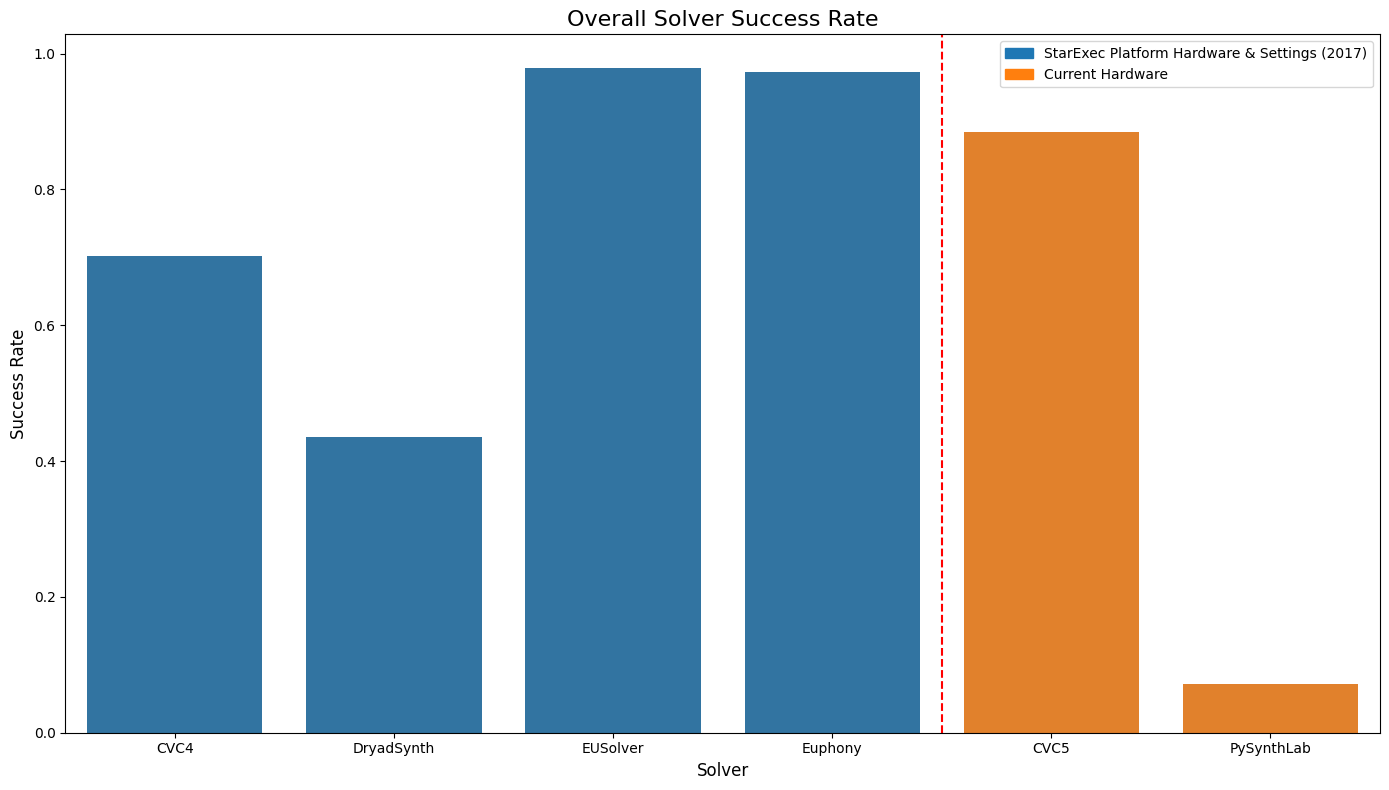

In [56]:
# split out cvc5 and pysynthlab results as they were run on my machine, and not the uber computer at star exec

different_hardware_solvers = ['CVC5', 'PySynthLab']
solver_performance['different_hardware'] = solver_performance['solver'].isin(different_hardware_solvers)
solver_performance = solver_performance.sort_values('different_hardware')
color_palette = ['#1f77b4' if not diff else '#ff7f0e' for diff in solver_performance['different_hardware']]

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='solver', y='success', data=solver_performance, palette=color_palette, hue='solver', legend=False)
if any(solver_performance['different_hardware']):
    plt.axvline(x=sum(~solver_performance['different_hardware']) - 0.5, color='red', linestyle='--')
    
plt.title('Overall Solver Success Rate', fontsize=16)
plt.xlabel('Solver', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
legend_elements = [Patch(facecolor='#1f77b4', edgecolor='#1f77b4', label='StarExec Platform Hardware & Settings (2017)'),
                   Patch(facecolor='#ff7f0e', edgecolor='#ff7f0e', label='Current Hardware')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig('overall_solver_success_rate.png')
plt.show()

In [47]:
successful_runs = df_combined[df_combined['success'] == True]
avg_time_successful = successful_runs.groupby('solver')['time'].mean().reset_index()
avg_time_successful = avg_time_successful.rename(columns={'time': 'avg_time_successful'})
print(avg_time_successful)

       solver  avg_time_successful
0        CVC4            24.647517
1        CVC5             0.767376
2  DryadSynth           198.253764
3    EUSolver            11.059878
4     Euphony            18.809981
5  PySynthLab             8.555844
